In [1]:
get_ipython().system('pip install db-dtypes')

In [2]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

CONFIGURE THE BIGQUERY SETTINGS

In [3]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [4]:
query = """
SELECT * FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [5]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   16833 non-null  object
 1   timeperiod              16833 non-null  Int64 
 2   week_number             16833 non-null  Int64 
 3   countyfips              16833 non-null  Int64 
 4   tract                   16833 non-null  Int64 
 5   tract_name              16833 non-null  object
 6   total_claims            16833 non-null  Int64 
 7   edu_8th_or_less         13748 non-null  Int64 
 8   edu_grades_9_11         5942 non-null   Int64 
 9   edu_hs_grad_equiv       6036 non-null   Int64 
 10  edu_post_hs             3246 non-null   Int64 
 11  edu_unknown             12031 non-null  Int64 
 12  top_category_employer1  16833 non-null  object
 13  top_category_employer2  16833 non-null  object
 14  top_category_employer3  16833 non-null  object
 15  ge

In [7]:
data.corr()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
timeperiod,1.000000,0.997239,-0.000939,-0.007423,-0.053561,0.022095,-0.020593,0.017385,-0.000578,-0.005404,-0.010375,0.020834,-0.000295,-0.003248,-0.014569,-0.081809,0.008955,NaN,0.017405,0.039299
week_number,0.997239,1.000000,-0.001015,-0.007765,-0.054817,0.021323,-0.021588,0.016370,0.001342,-0.005644,-0.008109,0.019749,-0.000070,-0.003663,-0.013924,-0.080145,0.008790,NaN,0.015683,0.036291
countyfips,-0.000939,-0.001015,1.000000,0.014993,-0.011242,-0.004784,0.003066,-0.039252,-0.048220,0.011492,-0.054918,-0.081006,-0.007179,0.005258,-0.018302,0.009645,-0.000593,NaN,-0.018666,-0.071035
tract,-0.007423,-0.007765,0.014993,1.000000,-0.041477,0.044356,-0.003742,-0.031720,-0.087579,0.006510,-0.016188,-0.009555,0.009147,0.003021,0.000662,-0.182185,-0.016876,NaN,-0.048066,0.002251
total_claims,-0.053561,-0.054817,-0.011242,-0.041477,1.000000,0.084509,0.480994,0.863481,0.629552,0.145159,0.767174,0.783093,0.020799,0.047452,0.041353,0.795195,0.254839,NaN,0.342631,0.683659
edu_8th_or_less,0.022095,0.021323,-0.004784,0.044356,0.084509,1.000000,0.014350,0.015608,-0.036702,-0.003891,0.052109,0.089749,-0.000671,-0.001192,0.014588,0.002723,0.051517,NaN,0.063414,0.133392
edu_grades_9_11,-0.020593,-0.021588,0.003066,-0.003742,0.480994,0.014350,1.000000,0.253993,0.086384,0.001510,0.437756,0.310162,-0.004423,-0.006219,0.064117,0.368575,0.125368,NaN,0.218931,0.363411
edu_hs_grad_equiv,0.017385,0.016370,-0.039252,-0.031720,0.863481,0.015608,0.253993,1.000000,0.109291,0.042798,0.632486,0.685100,NaN,0.028791,0.036650,0.689628,0.278505,NaN,0.322453,0.488501
edu_post_hs,-0.000578,0.001342,-0.048220,-0.087579,0.629552,-0.036702,0.086384,0.109291,1.000000,-0.003240,0.449063,0.428841,0.063897,0.044894,0.022885,0.506582,0.186814,NaN,0.177574,0.392262
edu_unknown,-0.005404,-0.005644,0.011492,0.006510,0.145159,-0.003891,0.001510,0.042798,-0.003240,1.000000,0.101526,0.090135,-0.000910,-0.001769,-0.001627,0.099446,0.014374,NaN,0.118185,0.058228


In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [9]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

CONFIGURE THE BIGQUERY SETTINGS

In [10]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [11]:
query = """
SELECT * FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [12]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   16833 non-null  object
 1   timeperiod              16833 non-null  Int64 
 2   week_number             16833 non-null  Int64 
 3   countyfips              16833 non-null  Int64 
 4   tract                   16833 non-null  Int64 
 5   tract_name              16833 non-null  object
 6   total_claims            16833 non-null  Int64 
 7   edu_8th_or_less         13748 non-null  Int64 
 8   edu_grades_9_11         5942 non-null   Int64 
 9   edu_hs_grad_equiv       6036 non-null   Int64 
 10  edu_post_hs             3246 non-null   Int64 
 11  edu_unknown             12031 non-null  Int64 
 12  top_category_employer1  16833 non-null  object
 13  top_category_employer2  16833 non-null  object
 14  top_category_employer3  16833 non-null  object
 15  ge

In [14]:
data.corr()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
timeperiod,1.000000,0.997239,-0.000939,-0.007423,-0.053561,0.022095,-0.020593,0.017385,-0.000578,-0.005404,-0.010375,0.020834,-0.000295,-0.003248,-0.014569,-0.081809,0.008955,NaN,0.017405,0.039299
week_number,0.997239,1.000000,-0.001015,-0.007765,-0.054817,0.021323,-0.021588,0.016370,0.001342,-0.005644,-0.008109,0.019749,-0.000070,-0.003663,-0.013924,-0.080145,0.008790,NaN,0.015683,0.036291
countyfips,-0.000939,-0.001015,1.000000,0.014993,-0.011242,-0.004784,0.003066,-0.039252,-0.048220,0.011492,-0.054918,-0.081006,-0.007179,0.005258,-0.018302,0.009645,-0.000593,NaN,-0.018666,-0.071035
tract,-0.007423,-0.007765,0.014993,1.000000,-0.041477,0.044356,-0.003742,-0.031720,-0.087579,0.006510,-0.016188,-0.009555,0.009147,0.003021,0.000662,-0.182185,-0.016876,NaN,-0.048066,0.002251
total_claims,-0.053561,-0.054817,-0.011242,-0.041477,1.000000,0.084509,0.480994,0.863481,0.629552,0.145159,0.767174,0.783093,0.020799,0.047452,0.041353,0.795195,0.254839,NaN,0.342631,0.683659
edu_8th_or_less,0.022095,0.021323,-0.004784,0.044356,0.084509,1.000000,0.014350,0.015608,-0.036702,-0.003891,0.052109,0.089749,-0.000671,-0.001192,0.014588,0.002723,0.051517,NaN,0.063414,0.133392
edu_grades_9_11,-0.020593,-0.021588,0.003066,-0.003742,0.480994,0.014350,1.000000,0.253993,0.086384,0.001510,0.437756,0.310162,-0.004423,-0.006219,0.064117,0.368575,0.125368,NaN,0.218931,0.363411
edu_hs_grad_equiv,0.017385,0.016370,-0.039252,-0.031720,0.863481,0.015608,0.253993,1.000000,0.109291,0.042798,0.632486,0.685100,NaN,0.028791,0.036650,0.689628,0.278505,NaN,0.322453,0.488501
edu_post_hs,-0.000578,0.001342,-0.048220,-0.087579,0.629552,-0.036702,0.086384,0.109291,1.000000,-0.003240,0.449063,0.428841,0.063897,0.044894,0.022885,0.506582,0.186814,NaN,0.177574,0.392262
edu_unknown,-0.005404,-0.005644,0.011492,0.006510,0.145159,-0.003891,0.001510,0.042798,-0.003240,1.000000,0.101526,0.090135,-0.000910,-0.001769,-0.001627,0.099446,0.014374,NaN,0.118185,0.058228


In [15]:
data.corr()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
timeperiod,1.000000,0.997239,-0.000939,-0.007423,-0.053561,0.022095,-0.020593,0.017385,-0.000578,-0.005404,-0.010375,0.020834,-0.000295,-0.003248,-0.014569,-0.081809,0.008955,NaN,0.017405,0.039299
week_number,0.997239,1.000000,-0.001015,-0.007765,-0.054817,0.021323,-0.021588,0.016370,0.001342,-0.005644,-0.008109,0.019749,-0.000070,-0.003663,-0.013924,-0.080145,0.008790,NaN,0.015683,0.036291
countyfips,-0.000939,-0.001015,1.000000,0.014993,-0.011242,-0.004784,0.003066,-0.039252,-0.048220,0.011492,-0.054918,-0.081006,-0.007179,0.005258,-0.018302,0.009645,-0.000593,NaN,-0.018666,-0.071035
tract,-0.007423,-0.007765,0.014993,1.000000,-0.041477,0.044356,-0.003742,-0.031720,-0.087579,0.006510,-0.016188,-0.009555,0.009147,0.003021,0.000662,-0.182185,-0.016876,NaN,-0.048066,0.002251
total_claims,-0.053561,-0.054817,-0.011242,-0.041477,1.000000,0.084509,0.480994,0.863481,0.629552,0.145159,0.767174,0.783093,0.020799,0.047452,0.041353,0.795195,0.254839,NaN,0.342631,0.683659
edu_8th_or_less,0.022095,0.021323,-0.004784,0.044356,0.084509,1.000000,0.014350,0.015608,-0.036702,-0.003891,0.052109,0.089749,-0.000671,-0.001192,0.014588,0.002723,0.051517,NaN,0.063414,0.133392
edu_grades_9_11,-0.020593,-0.021588,0.003066,-0.003742,0.480994,0.014350,1.000000,0.253993,0.086384,0.001510,0.437756,0.310162,-0.004423,-0.006219,0.064117,0.368575,0.125368,NaN,0.218931,0.363411
edu_hs_grad_equiv,0.017385,0.016370,-0.039252,-0.031720,0.863481,0.015608,0.253993,1.000000,0.109291,0.042798,0.632486,0.685100,NaN,0.028791,0.036650,0.689628,0.278505,NaN,0.322453,0.488501
edu_post_hs,-0.000578,0.001342,-0.048220,-0.087579,0.629552,-0.036702,0.086384,0.109291,1.000000,-0.003240,0.449063,0.428841,0.063897,0.044894,0.022885,0.506582,0.186814,NaN,0.177574,0.392262
edu_unknown,-0.005404,-0.005644,0.011492,0.006510,0.145159,-0.003891,0.001510,0.042798,-0.003240,1.000000,0.101526,0.090135,-0.000910,-0.001769,-0.001627,0.099446,0.014374,NaN,0.118185,0.058228


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/3188068582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


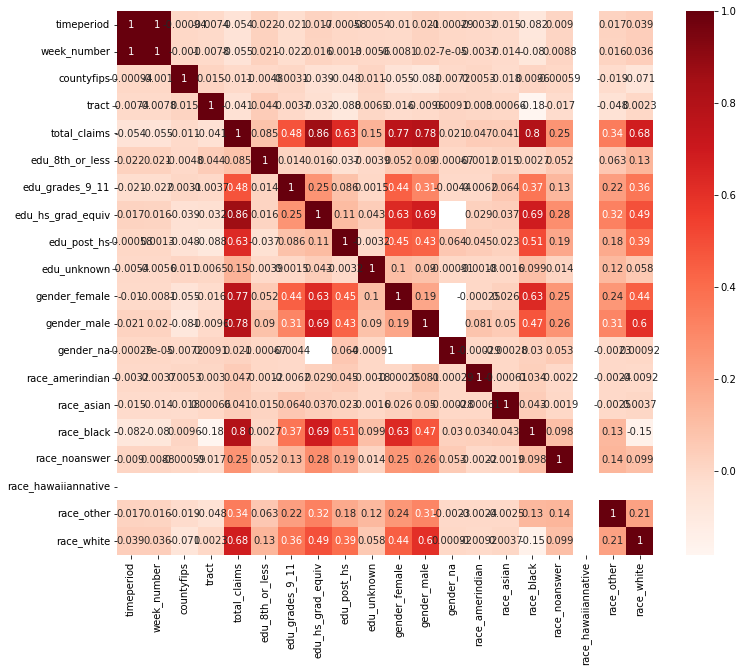

In [16]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/3639798860.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


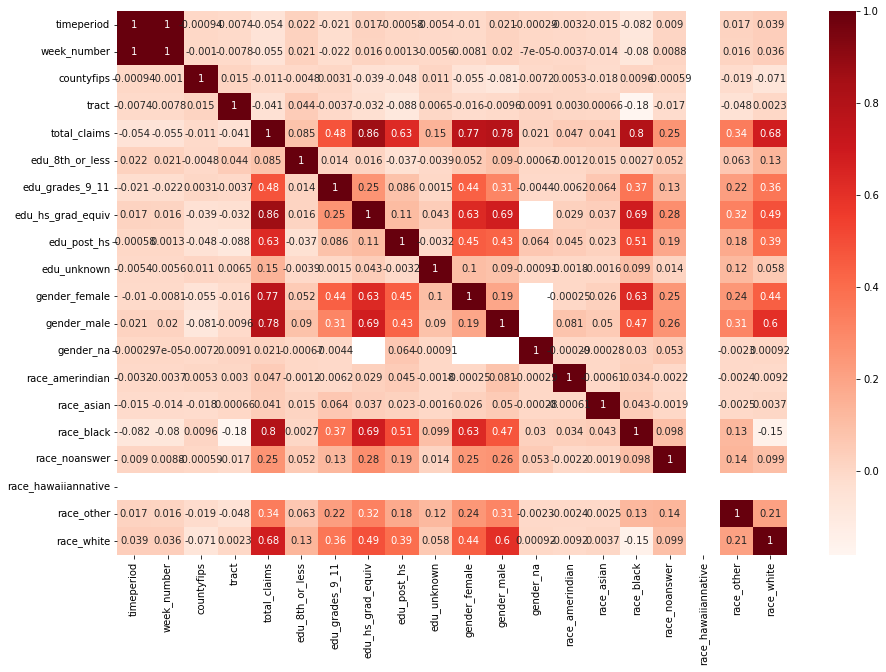

In [17]:
plt.figure(figsize=(15,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/1087202084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


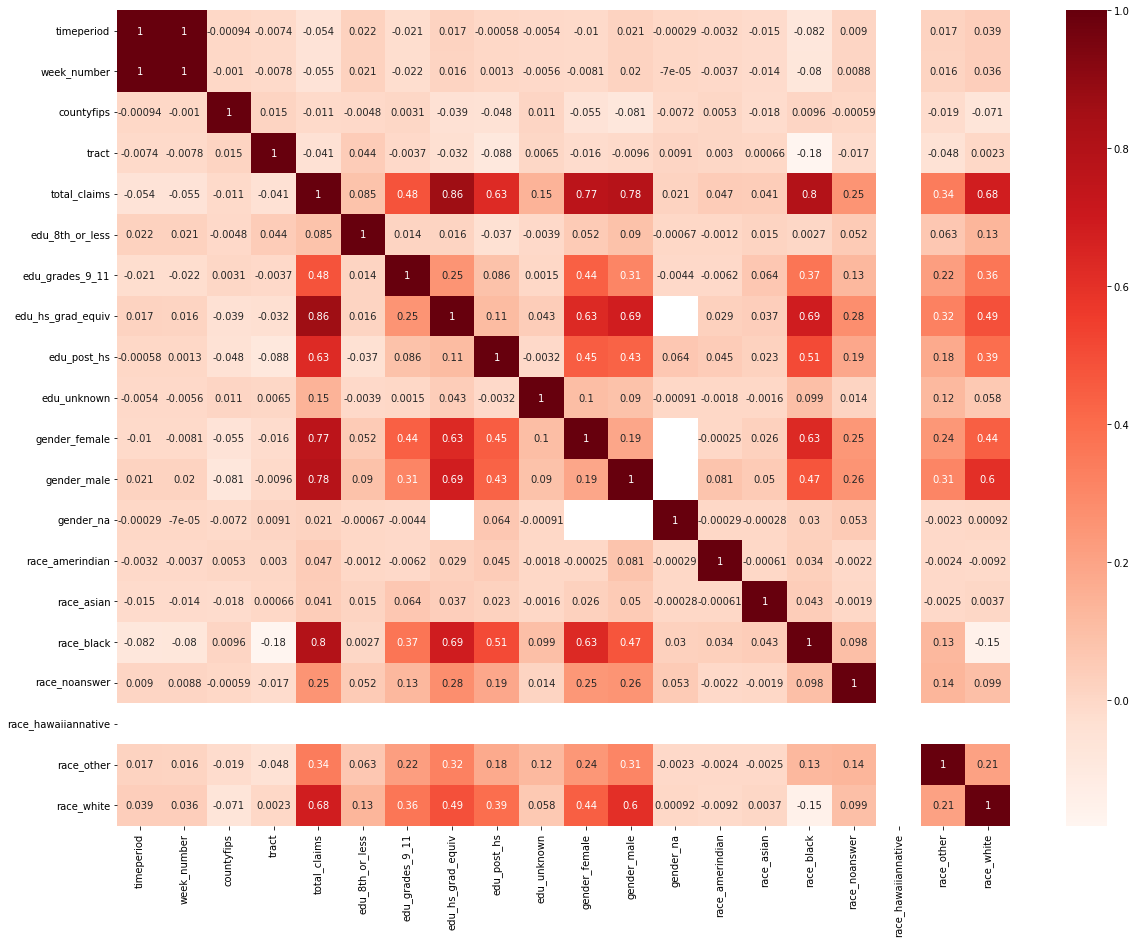

In [18]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor,mask=True annot=True, cmap=plt.cm.Reds)
plt.show()

SyntaxError: invalid syntax (1553655704.py, line 3)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/3380947292.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()
/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


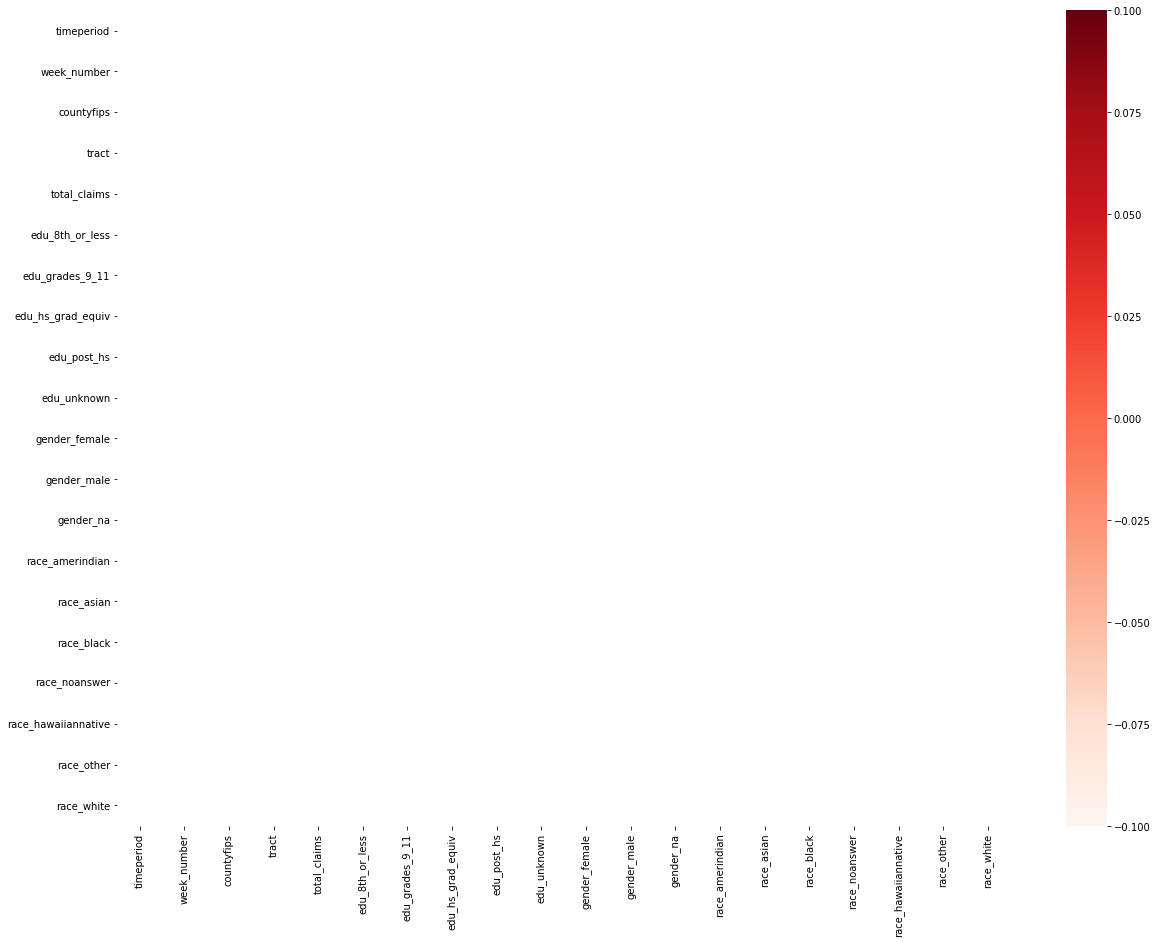

In [20]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor,mask=True,annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor,mask=mask,annot=True, cmap=plt.cm.Reds)
plt.show()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/1550006945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


NameError: name 'mask' is not defined

<Figure size 1440x1080 with 0 Axes>

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15236/1666615269.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


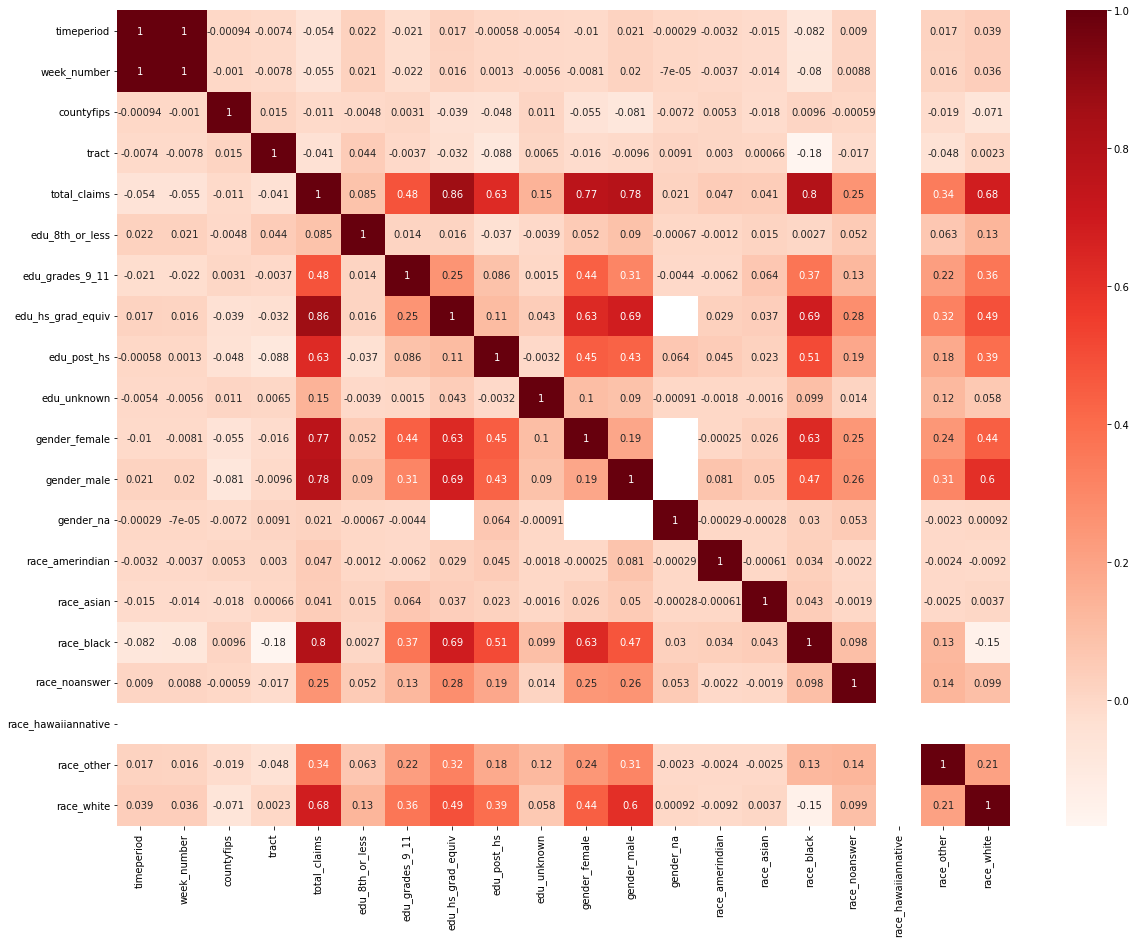

In [22]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
data.describe()

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
count,16833.0,16833.0,16833.0,16833.0,16833.0,13748.0,5942.0,6036.0,3246.0,12031.0,3835.0,3931.0,15868.0,15285.0,14939.0,7124.0,10089.0,16426.0,8075.0,6392.0
mean,20220540.093329,21.329531,18088.919682,211605.900315,22.952712,0.050989,1.291148,19.319583,16.923598,0.131992,18.957757,19.689138,0.005546,0.010926,0.014057,10.738069,0.207156,0.0,0.504396,17.312735
std,268.366832,11.618554,41.019467,288715.02492,14.583655,1.05481,5.320218,12.554864,10.889373,1.772384,11.939064,12.093698,0.454213,0.49316,0.568924,15.92762,2.51169,0.0,3.353956,11.623372
min,20220101.0,1.0,18001.0,100.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,20220312.0,11.0,18063.0,10100.0,14.0,0.0,0.0,12.0,11.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
50%,20220528.0,22.0,18095.0,42801.0,18.0,0.0,0.0,15.0,14.0,0.0,15.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
75%,20220806.0,32.0,18103.0,342600.0,27.0,0.0,0.0,22.0,20.0,0.0,22.0,23.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,21.0
max,20220910.0,37.0,18183.0,976400.0,170.0,41.0,78.0,137.0,154.0,60.0,126.0,139.0,49.0,36.0,41.0,163.0,110.0,0.0,74.0,155.0


In [24]:
data.shape()

TypeError: 'tuple' object is not callable

In [25]:
data.shape

(16833, 25)

In [26]:
for i in data.columns:
    print('The unique values in each feature are',len(data[i].value_counts()))

The unique values in each feature are 525
The unique values in each feature are 35
The unique values in each feature are 35
The unique values in each feature are 60
The unique values in each feature are 425
The unique values in each feature are 525
The unique values in each feature are 120
The unique values in each feature are 17
The unique values in each feature are 39
The unique values in each feature are 94
The unique values in each feature are 67
The unique values in each feature are 25
The unique values in each feature are 21
The unique values in each feature are 22
The unique values in each feature are 22
The unique values in each feature are 80
The unique values in each feature are 79
The unique values in each feature are 4
The unique values in each feature are 8
The unique values in each feature are 11
The unique values in each feature are 97
The unique values in each feature are 30
The unique values in each feature are 1
The unique values in each feature are 33
The unique valu

In [27]:
for i in data.columns:
    print('The unique values in',i,'are',len(data[i].value_counts()))

The unique values in uu_id are 525
The unique values in timeperiod are 35
The unique values in week_number are 35
The unique values in countyfips are 60
The unique values in tract are 425
The unique values in tract_name are 525
The unique values in total_claims are 120
The unique values in edu_8th_or_less are 17
The unique values in edu_grades_9_11 are 39
The unique values in edu_hs_grad_equiv are 94
The unique values in edu_post_hs are 67
The unique values in edu_unknown are 25
The unique values in top_category_employer1 are 21
The unique values in top_category_employer2 are 22
The unique values in top_category_employer3 are 22
The unique values in gender_female are 80
The unique values in gender_male are 79
The unique values in gender_na are 4
The unique values in race_amerindian are 8
The unique values in race_asian are 11
The unique values in race_black are 97
The unique values in race_noanswer are 30
The unique values in race_hawaiiannative are 1
The unique values in race_other ar

In [28]:
sum(data[race_white].isnull())

NameError: name 'race_white' is not defined

In [29]:
sum(data['race_white'].isnull())

10441

In [30]:
for i in data.columns:
    print('The null values in',i,'are',sum(data[i].isnull())

SyntaxError: unexpected EOF while parsing (968262709.py, line 2)

In [31]:
for i in data.columns:
    print('The null values in',i,'are',sum(data[i].isnull())

SyntaxError: unexpected EOF while parsing (968262709.py, line 2)

In [32]:
for i in data.columns:
    print('The null values in',i,'are',sum(data[i].isnull()))

The null values in uu_id are 0
The null values in timeperiod are 0
The null values in week_number are 0
The null values in countyfips are 0
The null values in tract are 0
The null values in tract_name are 0
The null values in total_claims are 0
The null values in edu_8th_or_less are 3085
The null values in edu_grades_9_11 are 10891
The null values in edu_hs_grad_equiv are 10797
The null values in edu_post_hs are 13587
The null values in edu_unknown are 4802
The null values in top_category_employer1 are 0
The null values in top_category_employer2 are 0
The null values in top_category_employer3 are 0
The null values in gender_female are 12998
The null values in gender_male are 12902
The null values in gender_na are 965
The null values in race_amerindian are 1548
The null values in race_asian are 1894
The null values in race_black are 9709
The null values in race_noanswer are 6744
The null values in race_hawaiiannative are 407
The null values in race_other are 8758
The null values in race

In [33]:
for i in data.columns:
    if sum(data[i].isnull())>0:
        print('The null values in',i,'are',sum(data[i].isnull()))      

The null values in edu_8th_or_less are 3085
The null values in edu_grades_9_11 are 10891
The null values in edu_hs_grad_equiv are 10797
The null values in edu_post_hs are 13587
The null values in edu_unknown are 4802
The null values in gender_female are 12998
The null values in gender_male are 12902
The null values in gender_na are 965
The null values in race_amerindian are 1548
The null values in race_asian are 1894
The null values in race_black are 9709
The null values in race_noanswer are 6744
The null values in race_hawaiiannative are 407
The null values in race_other are 8758
The null values in race_white are 10441


In [34]:
y=data['total_claims']

In [35]:
l=[]
for i in data.columns:
    if sum(data[i].isnull())>0:
        l.append(i)
        print('The null values in',i,'are',sum(data[i].isnull()))      

The null values in edu_8th_or_less are 3085
The null values in edu_grades_9_11 are 10891
The null values in edu_hs_grad_equiv are 10797
The null values in edu_post_hs are 13587
The null values in edu_unknown are 4802
The null values in gender_female are 12998
The null values in gender_male are 12902
The null values in gender_na are 965
The null values in race_amerindian are 1548
The null values in race_asian are 1894
The null values in race_black are 9709
The null values in race_noanswer are 6744
The null values in race_hawaiiannative are 407
The null values in race_other are 8758
The null values in race_white are 10441


In [36]:
l

['edu_8th_or_less',
 'edu_grades_9_11',
 'edu_hs_grad_equiv',
 'edu_post_hs',
 'edu_unknown',
 'gender_female',
 'gender_male',
 'gender_na',
 'race_amerindian',
 'race_asian',
 'race_black',
 'race_noanswer',
 'race_hawaiiannative',
 'race_other',
 'race_white']

In [37]:
for i in l:
    sns.countplot(data[i])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: boolean value of NA is ambiguous

In [38]:
data.isnull().sum(axis=0)

uu_id                         0
timeperiod                    0
week_number                   0
countyfips                    0
tract                         0
tract_name                    0
total_claims                  0
edu_8th_or_less            3085
edu_grades_9_11           10891
edu_hs_grad_equiv         10797
edu_post_hs               13587
edu_unknown                4802
top_category_employer1        0
top_category_employer2        0
top_category_employer3        0
gender_female             12998
gender_male               12902
gender_na                   965
race_amerindian            1548
race_asian                 1894
race_black                 9709
race_noanswer              6744
race_hawaiiannative         407
race_other                 8758
race_white                10441
dtype: int64